<h3 align='center'> CREDIT-CARD-FRAUD-DETECTION </h3>
<p align='center'><img src ="https://miro.medium.com/max/601/1*xSqK9iS7nZAaB-Sdwiwjow.png" />

From ancient times many philosophers have said a proverb which goes like this<br>

<h6 align='center'>" Every coin has two sides " </h6>

this quote by ancient philosophers is most relevant in this age of internet.If we interpret its underlying meaning we can say as much benefits internet brings to majority it also creates a new way for the minority to conduct misdeads, and credit card fraud is one such fraud.<br>.So our main objective is to create a model which can prevent credit card fraud detection as much as possible.and if our model cannot bring in any change we might as well throw it out the window.

##### Why credit card is a serious concern?

- Instead of representing the entire world let us take U.S because over 46% of the world's credit frauds happen in U.S
- Huge losses from card fraud transactions are expected to reach 40 billion dollars by 2027.
- On average, Americans lose $231 per credit card scam.
- credit card was ranked second right after Government documents or benefits fraud.
- In the year 2019 total fraud was 650,523 which increased to 1,387,615 in the year 2020 (there is a massive increase)
- The number of people affected by data breaches has decreased significantly, from over 2.5 billion in 2016 to just over 300 million in 2020. However the loss still continues

      I am in no way belittling U.S.A nor its citizens in anyway this details are just a reference to show how serious 
      of a concern it is

For further reading  [click this link ](https://www.fool.com/the-ascent/research/identity-theft-credit-card-fraud-statistics/)


### Importing necessary libraries

In [9]:
import pandas as pd # for working on table datas
import numpy as np  #for working on arrays and linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
import warnings #for avoiding unnecessary warnings and messages
import scipy #for mathematical operations
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

Please follow this link for the original dataset [click here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)



In [10]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/credit card fraud/creditcard.csv"
data = pd.read_csv(file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [11]:
data.shape

(284807, 31)

- we have 284807 rows with 31 features
- entire dataset is of datatype float
- only time and amount has been left alone as it is and every other feature was transformed using PCA.
- so we will check our models performance without transforming these two features and we will check the models performacne after transforming.

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


- the mean amount is 88 and max is 25691 there seems to be a lot of outliers present.
- As we can see this data has already been processed however when working on any classification problem it is important to check the ratio of our dependent column


In [13]:
df = data.copy()
# let us create a copy of our original file

In [14]:
df.columns = df.columns.str.lower()
# let us also convert columns into lowercase

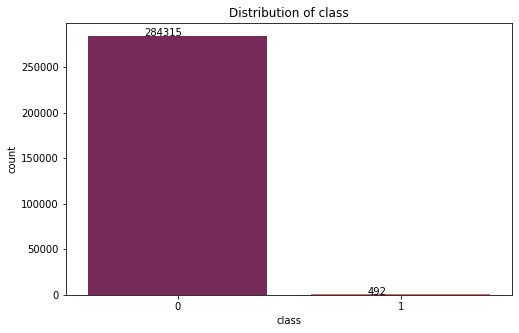

In [15]:
plt.figure(figsize =(8,5))
ax = sns.countplot(df['class'],palette ='rocket')
plt.title('Distribution of class')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

- as we can see there is a huge difference between the two values, if we create a model without taking this into consideration i am sure our model will achieve 98% accuracy which will be super not awesome.

- since in our columns except for time and amount most of the details have not been specified on what exactly they represent.Let us see the distribution of time and amount

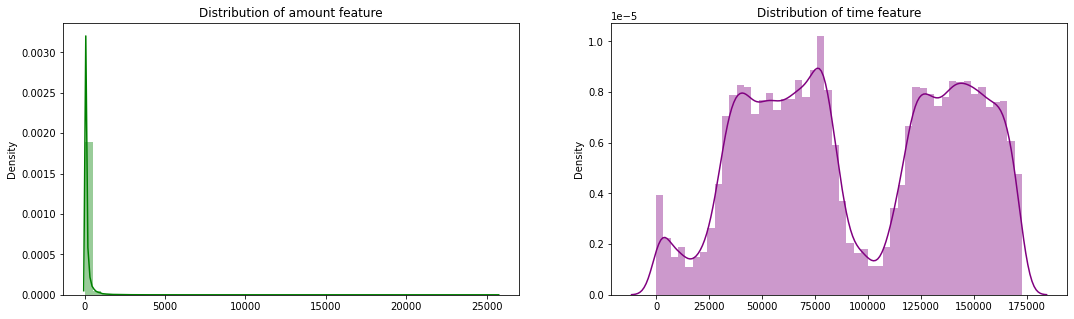

In [16]:
fig,ax = plt.subplots(1,2, figsize =(18,5))

amount_feature = df['amount'].values
time_feature = df['time'].values

sns.distplot(amount_feature,ax=ax[0],color='green')
ax[0].set_title('Distribution of amount feature')

sns.distplot(time_feature,ax=ax[1],color='purple')
ax[1].set_title('Distribution of time feature');

- as we first thought there are a lot of outliers in amount which must be removed let us also see how every other feature is distributed

### Transforming the time and amount

In [17]:
# we can use either standardscaler or robustscaler but since in our features there seems to be a lot of outliers present we will go with 
# robust scaler since it is less prone to outliers

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

df['new_amount'] = rob_scaler.fit_transform(df['amount'].values.reshape(-1,1))
df['new_time'] = rob_scaler.fit_transform(df['time'].values.reshape(-1,1))

# let us drop the original features

df.drop(['amount','time'],axis=1,inplace=True)

In [18]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v22,v23,v24,v25,v26,v27,v28,class,new_amount,new_time
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0,1.78,-0.99
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0,-0.27,-0.99
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0,4.98,-0.99
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0,1.42,-0.99
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0,0.67,-0.99


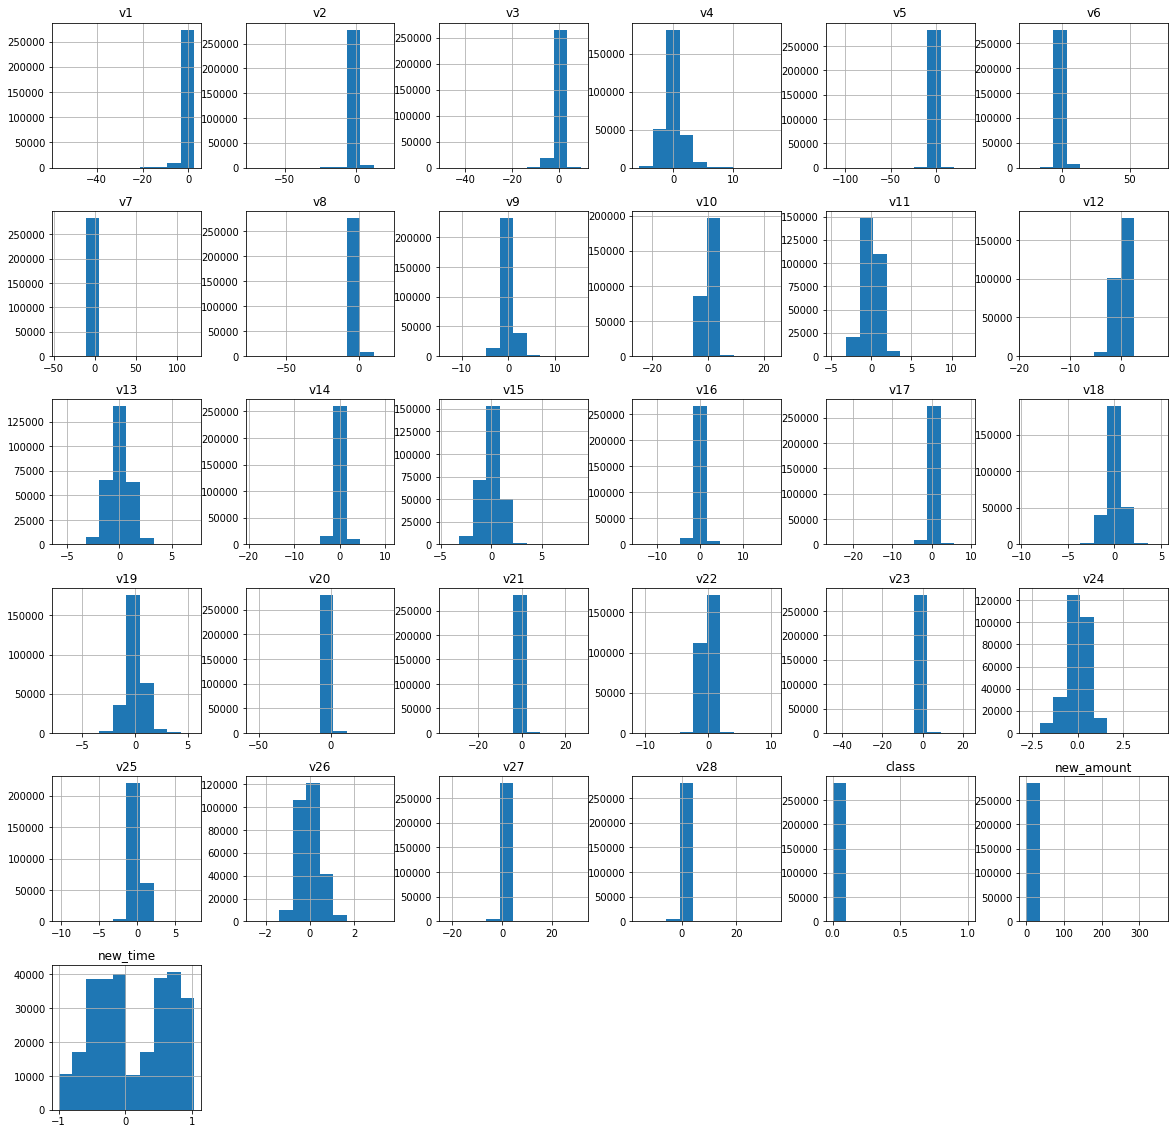

In [19]:
df.hist(figsize =(20,20))
plt.show();

- v13 and v26 are normally distributed
- remaining featuers in our dataset some are  right skewed and some are left skewed
- there are still some outliers present in amount and time we will take care of it during outliers removal

- let us also see the correlation between these features which will determine if we need to remove any features

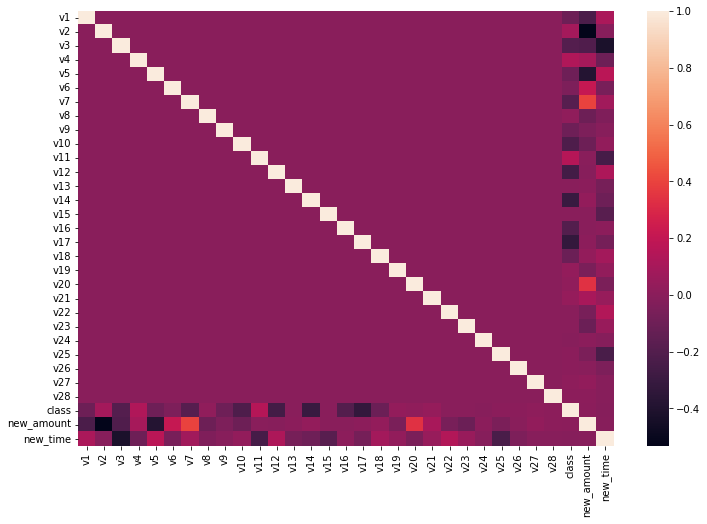

In [20]:
corrmat = df.corr()
fig = plt.figure(figsize =(12,8))
sns.heatmap(corrmat,cmap ='rocket');

Positive Correlation:

- v7 is highly correlated with amount
- v20 is highly correlated with amount

Negatice Correlation:

- v3 is negatively correlated with amount
- v5 is negatively correlated with amount
- class has a slight negative correlation with class

In [21]:
X = df.drop('class',axis=1)
y = df['class']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

- Even though there is an imbalanced dataset let us check the performance without using any balancing technique

### Linear Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [24]:
print('classification report:\n',metrics.classification_report(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
print('accuracy_Score\t:',metrics.accuracy_score(y_test,y_pred))
print('roc_auc_score\t:',metrics.roc_auc_score(y_test,y_pred))
print('recall\t\t:',metrics.recall_score(y_test,y_pred))
print('precision\t:',metrics.precision_score(y_test,y_pred))
print('f1 score\t:',metrics.f1_score(y_test,y_pred))
print('confusion_matrix:\n',metrics.confusion_matrix(y_test,y_pred))

accuracy_Score	: 0.9991924440855307
roc_auc_score	: 0.8167525428084921
recall		: 0.6336633663366337
precision	: 0.8767123287671232
f1 score	: 0.7356321839080459
confusion_matrix:
 [[56852     9]
 [   37    64]]


#### performances on different algorithms as an imbalanced dataset

In [26]:
data = [{'accuracy':0.978,'roc_auc_score':0.914,"recall":0.851,'precision':0.065,'f1 score':0.121},
        {'accuracy':0.999,'roc_auc_score':0.900,"recall":0.801,'precision':0.931,'f1 score':0.861},
        {'accuracy':0.999,'roc_auc_score':0.890,"recall":0.782,'precision':0.782,'f1 score':0.782},
        {'accuracy':0.999,'roc_auc_score':0.895,"recall":0.792,'precision':0.930,'f1 score':0.855}]
scores = pd.DataFrame(data,index=['GaussianNB','KNearestNeighbor','DecisionTree','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
scores

,accuracy,roc_auc_score,recall,precision,f1 score
GaussianNB,0.978,0.914,0.851,0.065,0.121
KNearestNeighbor,0.999,0.900,0.801,0.931,0.861
DecisionTree,0.999,0.890,0.782,0.782,0.782
RandomForestClassifier,0.999,0.895,0.792,0.930,0.855


- When considering an imbalanced dataset accuracy should never be considered as the best performance metric.

### what other performance measures we can use?

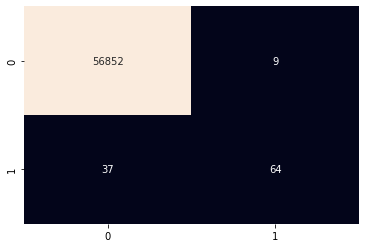

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cbar=False,fmt='.5g');

let us take the above heatmap and understand:

- Recall : in layman terms we can say when the number was 1 model predicted 0
      formula: TP / TP + FN
      predicted positive values(64) / predicted positive values(64) + when it was 1 predicted 0(37)
       = 64 / 101 = 63.6

- Precision: out of the total 1's predicted how much was actual 1's
      formula: TP / TP + Fp
      predicted positive values(64) / predicted positive values(64) + when it was 0 predicted 1(9)
       = 64 / 73 = 87.67
- F1 score: f1 score balances out both precision and recall
      formula : 2 * (precision *recall) / (precision + recall)
      = 2 * ( 63.6* 87.67) / (63.6+ 87.67)
      = 73.71
- Roc curve:  Roc curve draws a line between recall and precision which specifies how good model can identify each class,the larger the curve better our model is 
<p align ='center'><img src="https://miro.medium.com/max/1400/1*thHBCWlaKWIkouryKBh6Wg.jpeg"/>
 
     

- so after all this if we check our real accuracy it will be <br>
64 / 101 = 63.3 <br>but our accuracy given by the model was 99.9 so this is the reason why we should never consider the accuracy as the performance metric for imbalaced dataset

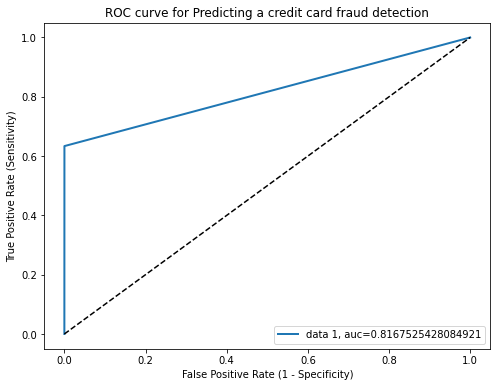

In [28]:
plt.figure(figsize=(8,6))
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(false_pos_rate,true_pos_rate,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Now that we are done with understanding different performance measures and what they represent how can we proceed with our main problem which was<br>
***How can we deal with an imbalanced dataset?***

well there are a lot of measures we can take:
- undersampling
- oversampling
- random under and oversampling with imblearn
- SMOTE
- tomek links
- Near miss

There is no such thing as one best thing everything has its own adantages and disadvantages,its all about experimenting

In [29]:
def performance_metrics(feature):
  print('accuracy_Score\t:',metrics.accuracy_score(y_test,feature))
  print('roc_auc_score\t:',metrics.roc_auc_score(y_test,feature))
  print('recall\t\t:',metrics.recall_score(y_test,feature))
  print('precision\t:',metrics.precision_score(y_test,feature))
  print('f1 score\t:',metrics.f1_score(y_test,feature))


In [30]:
def roc_curve(feature):
  plt.figure(figsize=(8,6))
  false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(y_test, feature)

  auc = metrics.roc_auc_score(y_test, feature)
  plt.plot(false_pos_rate,true_pos_rate,linewidth=2, label="data 1, auc="+str(auc))
  plt.legend(loc=4)

  plt.plot([0,1], [0,1], 'k--' )
  plt.title('ROC curve for Predicting a credit card fraud detection')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')

  plt.show()

In [31]:
def confusion(feature):
  cm =  metrics.confusion_matrix(y_test,feature)
  sns.heatmap(cm,annot=True,cbar=False, fmt=".5g");

### 1. Undersampling

In [32]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_rus)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 391, 1: 391})


- Logistic regression

In [33]:
log_reg1 = LogisticRegression()
log_reg1.fit(x_rus,y_rus)
y_pred1 = log_reg1.predict(X_test)
# never predict on the undersampled or oversampled data

- let us find the different performance measures

In [34]:
performance_metrics(y_pred1)

accuracy_Score	: 0.9674870966609318
roc_auc_score	: 0.9540644625655651
recall		: 0.9405940594059405
precision	: 0.04894384337970119
f1 score	: 0.0930460333006856


- let us plot the ROC curve

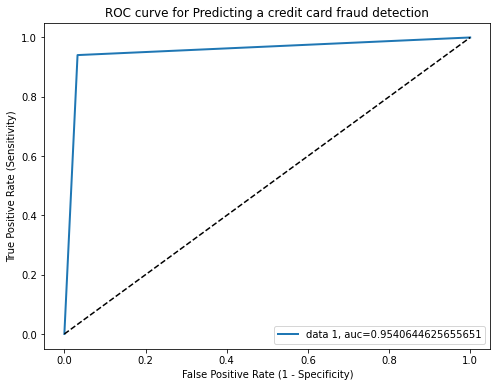

In [35]:
roc_curve(y_pred1)

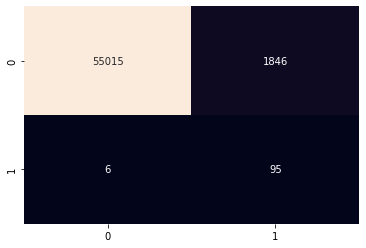

In [36]:
confusion(y_pred1)

-  Performances of different algorithms on an undersampled data

In [37]:
data = [{'accuracy':0.974,'roc_auc_score':0.927,"recall":0.881,'precision':0.057,'f1 score':0.108},
        {'accuracy':0.973,'roc_auc_score':0.942,"recall":0.910,'precision':0.056,'f1 score':0.106},
        {'accuracy':0.905,'roc_auc_score':0.898,"recall":0.891,'precision':0.016,'f1 score':0.032},
        {'accuracy':0.977,'roc_auc_score':0.934,"recall":0.891,'precision':0.065,'f1 score':0.121}]
scores = pd.DataFrame(data,index=['NaiveBayes','KNearestNeighbor','DecisionTree','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
scores

,accuracy,roc_auc_score,recall,precision,f1 score
NaiveBayes,0.974,0.927,0.881,0.057,0.108
KNearestNeighbor,0.973,0.942,0.910,0.056,0.106
DecisionTree,0.905,0.898,0.891,0.016,0.032
RandomForestClassifier,0.977,0.934,0.891,0.065,0.121


### 2.Oversampling

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X_train, y_train)

In [39]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 227454, 1: 227454})


- Logistic Regression

In [40]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_ros,y_ros)
y_pred2 = log_reg2.predict(X_test)

In [41]:
performance_metrics(y_pred2)

accuracy_Score	: 0.9770548786910572
roc_auc_score	: 0.9588568510216245
recall		: 0.9405940594059405
precision	: 0.0680515759312321
f1 score	: 0.12692050768203073


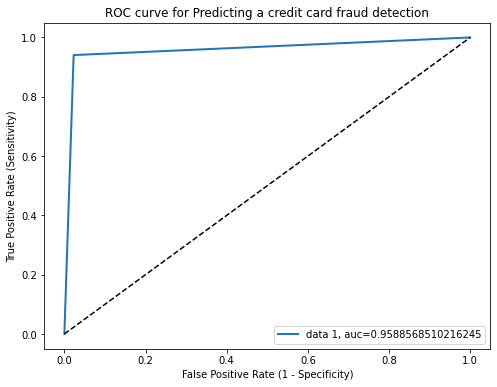

In [42]:
roc_curve(y_pred2)

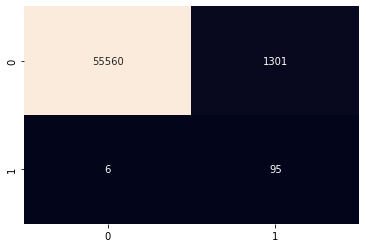

In [43]:
confusion(y_pred2)

- Performances of different algorithms on an Oversampled data

In [44]:
data = [{'accuracy':0.973,'roc_auc_score':0.922,"recall":0.871,'precision':0.056,'f1 score':0.105},
        {'accuracy':0.999,'roc_auc_score':0.930,"recall":0.861,'precision':0.731,'f1 score':0.790},
        {'accuracy':0.999,'roc_auc_score':0.880,"recall":0.762,'precision':0.777,'f1 score':0.769},
        {'accuracy':0.999,'roc_auc_score':0.910,"recall":0.821,'precision':0.922,'f1 score':0.869}]
scores = pd.DataFrame(data,index=['NaiveBayes','KNearestNeighbor','DecisionTree','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
scores

,accuracy,roc_auc_score,recall,precision,f1 score
NaiveBayes,0.973,0.922,0.871,0.056,0.105
KNearestNeighbor,0.999,0.930,0.861,0.731,0.790
DecisionTree,0.999,0.880,0.762,0.777,0.769
RandomForestClassifier,0.999,0.910,0.821,0.922,0.869


### 3.SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [46]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smote)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 227454, 1: 227454})


In [47]:
log_reg3 = LogisticRegression()
log_reg3.fit(x_smote,y_smote)
y_pred3 = log_reg3.predict(X_test)

In [48]:
performance_metrics(y_pred3)

accuracy_Score	: 0.9757733225659211
roc_auc_score	: 0.958214934769712
recall		: 0.9405940594059405
precision	: 0.06466984343090537
f1 score	: 0.12101910828025476


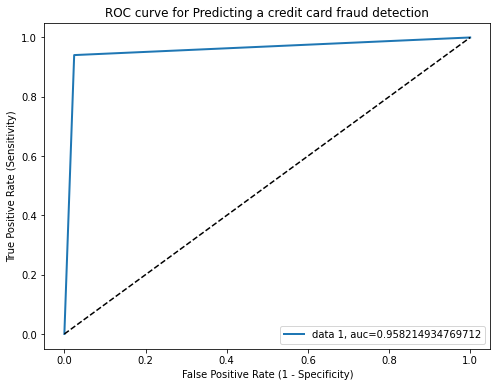

In [49]:
roc_curve(y_pred3)

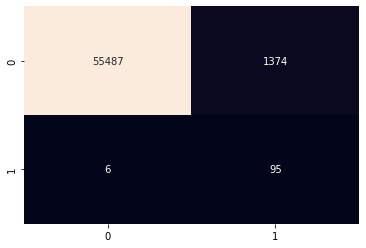

In [50]:
confusion(y_pred3)

- Performances of different algorithms on a SMOTE data

In [51]:
data = [{'accuracy':0.975,'roc_auc_score':0.928,"recall":0.881,'precision':0.059,'f1 score':0.111},
        {'accuracy':0.998,'roc_auc_score':0.944,"recall":0.891,'precision':0.517,'f1 score':0.654},
        {'accuracy':0.997,'roc_auc_score':0.919,"recall":0.841,'precision':0.447,'f1 score':0.584},
        {'accuracy':0.999,'roc_auc_score':0.920,"recall":0.841,'precision':0.867,'f1 score':0.854}]
scores = pd.DataFrame(data,index=['NaiveBayes','KNearestNeighbor','DecisionTree','RandomForestClassifier'])
pd.options.display.float_format = '{:.3f}'.format
scores

,accuracy,roc_auc_score,recall,precision,f1 score
NaiveBayes,0.975,0.928,0.881,0.059,0.111
KNearestNeighbor,0.998,0.944,0.891,0.517,0.654
DecisionTree,0.997,0.919,0.841,0.447,0.584
RandomForestClassifier,0.999,0.920,0.841,0.867,0.854


### Now comes another important question which metric should we go to

- ***Precision and Recall*** - when we have less positive classes or positive classes is our main focus
- ***ROC curve and F1 score*** - when both classes are equally important to us
- we will go with ROC curve since both the clases are equally important

#### And logistic Regression under random over sampling and SMOTE gave us the best roc_score ,but we will go with random_over_sampling

### Hyperparameter tuning- GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [54]:
parameters={"C":[0.25, 0.5, 0.75, 1], "penalty":["l1","l2"]}

classifier = LogisticRegression()
gridsearch = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          cv = 10)
gridsearch.fit(x_ros,y_ros)

print("best parameters",gridsearch.best_params_)
print("accuracy :",gridsearch.best_score_)

best parameters {'C': 0.25, 'penalty': 'l2'}
accuracy : 0.9433160088352601


In [60]:
classi = LogisticRegression(C=0.25,penalty='l2')
classi.fit(x_ros,y_ros)
y_predict = classi.predict(X_test)

In [61]:
performance_metrics(y_predict)

accuracy_Score	: 0.9771075453811313
roc_auc_score	: 0.9588832311415662
recall		: 0.9405940594059405
precision	: 0.0681981335247667
f1 score	: 0.12717536813922356


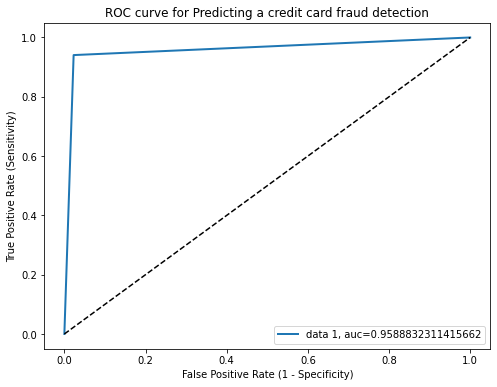

In [62]:
roc_curve(y_predict)

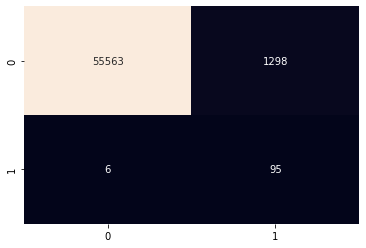

In [63]:
confusion(y_predict)